In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Get the iris datsset

In [4]:
filename = '../Opdrachten/datasets/iris.csv'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(filename, names = names)

In [5]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
df['species'] = df['species'].astype('category')

In [7]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

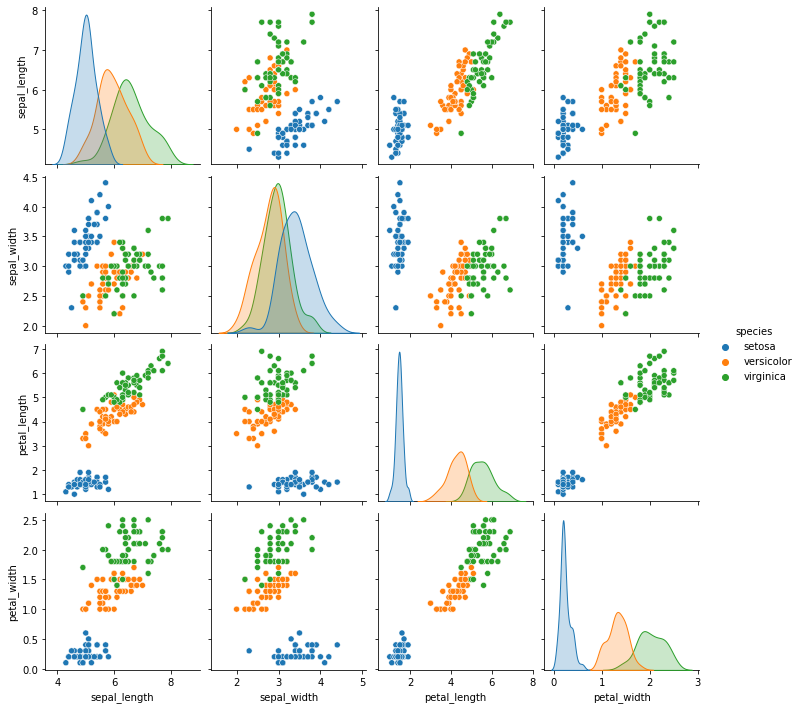

In [8]:
sns.pairplot(data=df, hue="species")

## Split in test and training datasets

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=50)

In [10]:
print( 'Training dataset', df_train.shape )
print( 'Test dataset', df_test.shape )

Training dataset (100, 5)
Test dataset (50, 5)


## Split features and target

In [11]:
feature_names = names[:-1]
target_name = names[-1]
df_train_features = df_train[feature_names]
df_train_target = df_train[target_name]
df_test_features = df_test[feature_names]
df_test_target = df_test[target_name]

## Scale the features

In [12]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# scaler = StandardScaler()
scaler = MinMaxScaler()

scaler.fit(df_train_features)

train_features_scaled = scaler.transform(df_train_features)
test_features_scaled = scaler.transform(df_test_features)

In [13]:
train_features_scaled

array([[0.11428571, 0.41666667, 0.07017544, 0.        ],
       [0.2       , 0.20833333, 0.35087719, 0.41666667],
       [0.57142857, 0.29166667, 0.75438596, 0.75      ],
       [0.45714286, 0.58333333, 0.61403509, 0.625     ],
       [0.4       , 0.83333333, 0.03508772, 0.04166667],
       [0.54285714, 0.20833333, 0.68421053, 0.58333333],
       [0.37142857, 0.25      , 0.43859649, 0.375     ],
       [0.54285714, 0.58333333, 0.80701754, 0.95833333],
       [0.05714286, 0.66666667, 0.        , 0.04166667],
       [0.11428571, 0.58333333, 0.15789474, 0.04166667],
       [1.        , 0.75      , 0.94736842, 0.79166667],
       [0.57142857, 0.45833333, 0.78947368, 0.70833333],
       [0.48571429, 0.33333333, 0.52631579, 0.5       ],
       [0.14285714, 0.41666667, 0.07017544, 0.04166667],
       [0.51428571, 0.08333333, 0.61403509, 0.58333333],
       [0.22857143, 0.625     , 0.0877193 , 0.04166667],
       [0.2       , 0.75      , 0.15789474, 0.125     ],
       [0.22857143, 0.875     ,

## Classification with k-Nearest Neighbor

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5)

knn_classifier.fit(train_features_scaled, df_train_target)

KNeighborsClassifier()

In [15]:
predicted = knn_classifier.predict(test_features_scaled)

In [16]:
predicted

array(['virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'virginica'], dtype=object)

In [17]:
df_prediction = pd.DataFrame(df_test_target)

In [18]:
df_prediction['predicted_5NN'] = predicted

In [19]:
df_prediction['correct_5NN']=df_prediction['predicted_5NN']==df_prediction['species']

In [20]:
df_prediction

,species,predicted_5NN,correct_5NN
114,virginica,virginica,True
37,setosa,setosa,True
117,virginica,virginica,True
86,versicolor,versicolor,True
0,setosa,setosa,True
3,setosa,setosa,True
35,setosa,setosa,True
121,virginica,virginica,True
36,setosa,setosa,True
31,setosa,setosa,True


In [21]:
n_correct = np.sum(df_prediction['correct_5NN'])
n_total = df_prediction.shape[0]

print(n_correct, 'van de', n_total, 'correct')

49 van de 50 correct


In [22]:
accuracy = n_correct / n_total
print('Accuracy', accuracy*100, '%')

Accuracy 98.0 %


## Classification met Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(train_features_scaled, df_train_target)

DecisionTreeClassifier()

In [24]:
predicted = dt_classifier.predict(test_features_scaled)

In [25]:
df_prediction = pd.DataFrame(df_test_target)
df_prediction['predicted_DT'] = predicted
df_prediction['correct_DT']=df_prediction['predicted_DT']==df_prediction['species']

In [26]:
df_prediction

,species,predicted_DT,correct_DT
114,virginica,virginica,True
37,setosa,setosa,True
117,virginica,virginica,True
86,versicolor,versicolor,True
0,setosa,setosa,True
3,setosa,setosa,True
35,setosa,setosa,True
121,virginica,virginica,True
36,setosa,setosa,True
31,setosa,setosa,True


In [28]:
n_correct = np.sum(df_prediction['correct_DT'])
n_total = df_prediction.shape[0]

print(n_correct, 'van de', n_total, 'correct')

49 van de 50 correct


In [29]:
accuracy = n_correct / n_total
print('Accuracy', accuracy*100, '%')

Accuracy 98.0 %


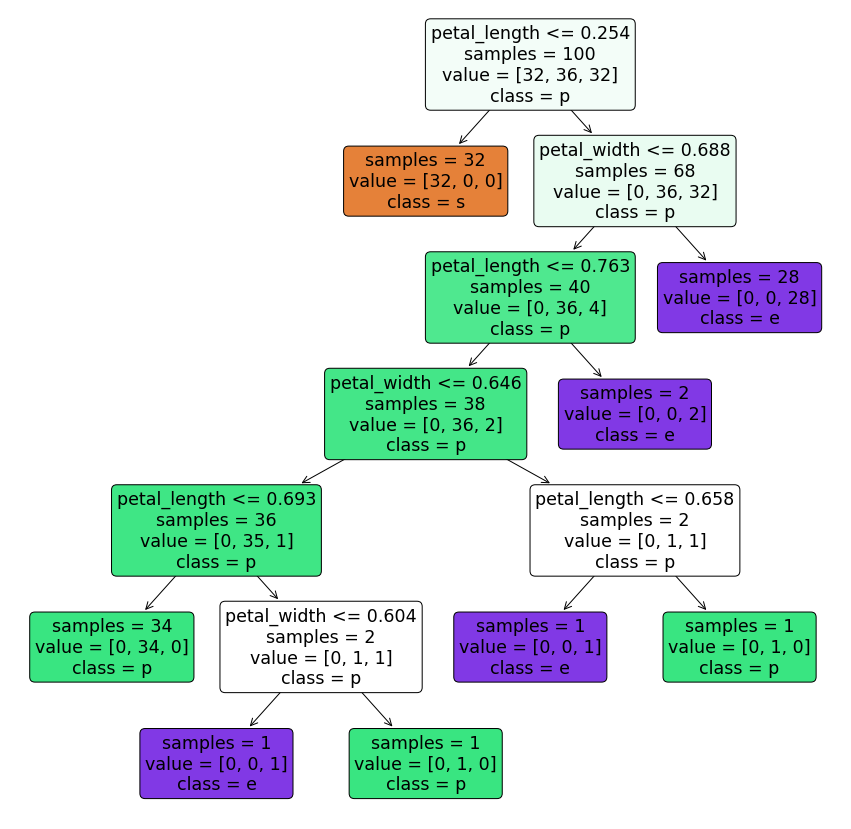

In [30]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(dt_classifier, 
               feature_names = names[:-1],
               class_names = names[-1],
               filled = True,
               rounded = True, 
               impurity = False)
plt.show()

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

rf_classifier.fit(train_features_scaled, df_train_target)

RandomForestClassifier()

In [34]:
predicted = rf_classifier.predict(test_features_scaled)

In [35]:
df_prediction = pd.DataFrame(df_test_target)
df_prediction['predicted_RF'] = predicted
df_prediction['correct_RF']=df_prediction['predicted_RF']==df_prediction['species']

In [36]:
df_prediction

,species,predicted_RF,correct_RF
114,virginica,virginica,True
37,setosa,setosa,True
117,virginica,virginica,True
86,versicolor,versicolor,True
0,setosa,setosa,True
3,setosa,setosa,True
35,setosa,setosa,True
121,virginica,virginica,True
36,setosa,setosa,True
31,setosa,setosa,True


In [38]:
n_correct = np.sum(df_prediction['correct_RF'])
n_total = df_prediction.shape[0]

print(n_correct, 'van de', n_total, 'correct')

48 van de 50 correct


In [39]:
accuracy = n_correct / n_total
print('Accuracy', accuracy*100, '%')

Accuracy 96.0 %
